# First Look to the Data and Exploring 

Currently, we have five different datasets, satellite radar coherence products representing the satellite signal changes reflected on the water surface, 



## Aim of this notebook
 Aim of this notebook is data understanding, preparation and exploration. In this notebook, we will explore three different data files, first one, "dvalue_all_" refers to all data in Everglade from 2016 to 2019
second one, "DryDataAll" refers to all data in dry seasons 
third one, "WetDataAll" refers to all data in wet seasons

In this notebook, we will read and load each data file, to understand the meaning and pattern of each columns. With the help of visualizations, we will look at the relationship between features and the label. 

Then we will prepare our data to modeling and save them to new data files to use in "Step2_MLRegression-FeatureImportanceOnInSARCoherence.ipynb".

In this project, we currently have five features and one label for regression problem in hydrological monitoring and analysis. 


## Import all the necessary python packages for Data Pre-processing and EDA

In [73]:
import pandas as pd
import numpy as np
import os
import xlsxwriter
#!pip install xlsxwriter
#!pip install autopep8

# python packages related to model evaluation
from sklearn.metrics import r2_score  # R_2
from sklearn.metrics import mean_squared_error # RMSE
from sklearn.metrics import mean_absolute_error as mae # MAE

# python packages related to data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## Load the first data file "dvalue_all_" to work on all the data 

In [74]:
# set the working path of files
path = '../../Data/'
    
# Get all the files in the folder of Data
fileList = os.listdir(path)
    
#
get_key = lambda i: i.split('.')[0]
new_sort = sorted(fileList, key=get_key)
#print(fileList, '\n', new_sort)
#n = 0
    
# Output working path

#file path to store the new dataframe after data pre-processing and EDA
outpathdfl = '../../Data/Processed/'
    
# change the working path to dataframe after exploratory data analysis. 
    
#initialize a dataframe first 
df = pd.DataFrame()
    
#for i in fileList:
#for i in range(len(fileList)):   # if loop through each file, we need reformat the codes
#for i in [1]:
 
 #file = new_sort[i]
file = 'dvalue_all_.xlsx'

# read the excel file and generate a dataframe
        
features = pd.read_excel(path+file,engine='openpyxl')
print(features.head(5))
         
# get the filename
filename = file.split('.', 1)[0]
print("\n")

print('Now Pre-processing ：'+filename + ' Dataset')

  station              X             Y  coherence  waterlevel  temperature  \
0   2A300  559117.217587  2.903105e+06   0.219655    12.01453      1.41553   
1    3A-5  529481.312877  2.881992e+06   0.913499     4.20483      1.36663   
2    3A10  525986.397592  2.906657e+06   0.287204    12.86500      1.45475   
3    3A11  525611.524169  2.899888e+06   0.892549     5.53904      1.45068   
4    3A12  532423.388611  2.894458e+06   0.963816     5.96763      1.40197   

   u_component of wind  v_component of wind  precipitation  year  month  day  
0            -1.680144            -5.822137      -0.000301  2016      9   27  
1            -1.685898            -5.976104      -0.000566  2016      9   27  
2            -1.692453            -5.773890      -0.000328  2016      9   27  
3            -1.721673            -5.863188      -0.000395  2016      9   27  
4            -1.714358            -5.927009      -0.000417  2016      9   27  


Now Pre-processing ：dvalue_all_ Dataset


### Data Exploring

In [75]:
type(features)

pandas.core.frame.DataFrame

In [76]:
# look at the column
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20054 entries, 0 to 20053
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station              20054 non-null  object 
 1   X                    20054 non-null  float64
 2   Y                    20054 non-null  float64
 3   coherence            20054 non-null  float64
 4   waterlevel           20054 non-null  float64
 5   temperature          20054 non-null  float64
 6   u_component of wind  20054 non-null  float64
 7   v_component of wind  20054 non-null  float64
 8   precipitation        20054 non-null  float64
 9   year                 20054 non-null  int64  
 10  month                20054 non-null  int64  
 11  day                  20054 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 1.8+ MB


In [77]:
# to check whether there are null values
features.isna().sum()

station                0
X                      0
Y                      0
coherence              0
waterlevel             0
temperature            0
u_component of wind    0
v_component of wind    0
precipitation          0
year                   0
month                  0
day                    0
dtype: int64

In [78]:
# See the basic statistical values for each column
features.describe()

,X,Y,coherence,waterlevel,temperature,u_component of wind,v_component of wind,precipitation,year,month,day
count,20054.000000,2.005400e+04,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,2.005400e+04,20054.000000,20054.000000,20054.000000
mean,534074.864569,2.859877e+06,0.758599,-0.236245,-0.032172,-0.033535,-0.002138,-6.252405e-06,2017.945946,6.527027,15.405405
std,23202.957090,3.845054e+04,0.258672,14.217156,2.578857,3.963425,3.941798,3.034430e-04,0.998563,3.549824,8.798129
min,465270.323680,2.792955e+06,-0.028048,-69.742680,-8.447650,-11.392262,-11.309864,-1.887454e-03,2016.000000,1.000000,1.000000
25%,519158.578041,2.832219e+06,0.595828,-5.845610,-1.295905,-2.416155,-2.184203,-3.417542e-05,2017.000000,3.000000,8.000000
50%,539391.232002,2.852339e+06,0.871856,-2.454805,-0.004975,-0.260815,0.558732,1.569055e-07,2018.000000,7.000000,15.000000
75%,550504.092149,2.894706e+06,0.970736,2.137730,1.071900,2.839885,2.069064,3.744369e-05,2019.000000,10.000000,24.000000
max,577518.997897,2.950812e+06,0.999823,133.005540,11.220980,9.970614,13.584830,1.867207e-03,2019.000000,12.000000,31.000000


In [79]:
# add an index column to the features dataframe using pandas
features.reset_index(inplace =True)
features.head()

,index,station,X,Y,coherence,waterlevel,temperature,u_component of wind,v_component of wind,precipitation,year,month,day
0,0,2A300,559117.217587,2.903105e+06,0.219655,12.01453,1.41553,-1.680144,-5.822137,-0.000301,2016,9,27
1,1,3A-5,529481.312877,2.881992e+06,0.913499,4.20483,1.36663,-1.685898,-5.976104,-0.000566,2016,9,27
2,2,3A10,525986.397592,2.906657e+06,0.287204,12.86500,1.45475,-1.692453,-5.773890,-0.000328,2016,9,27
3,3,3A11,525611.524169,2.899888e+06,0.892549,5.53904,1.45068,-1.721673,-5.863188,-0.000395,2016,9,27
4,4,3A12,532423.388611,2.894458e+06,0.963816,5.96763,1.40197,-1.714358,-5.927009,-0.000417,2016,9,27


In [80]:
# calculate mutual information to figure out the dependency of label on each feature
from sklearn.feature_selection import mutual_info_regression

X = features[['waterlevel','temperature','u_component of wind', 'v_component of wind','precipitation']]
y = features['coherence']

def make_mi_scores(X, y):
    # X representes features
    # y represents label
    
    mi_scores = mutual_info_regression(X,y)
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

mi_scores = make_mi_scores(X,y)
mi_scores


waterlevel             0.245223
precipitation          0.224814
temperature            0.221010
u_component of wind    0.215685
v_component of wind    0.206887
Name: MI Scores, dtype: float64

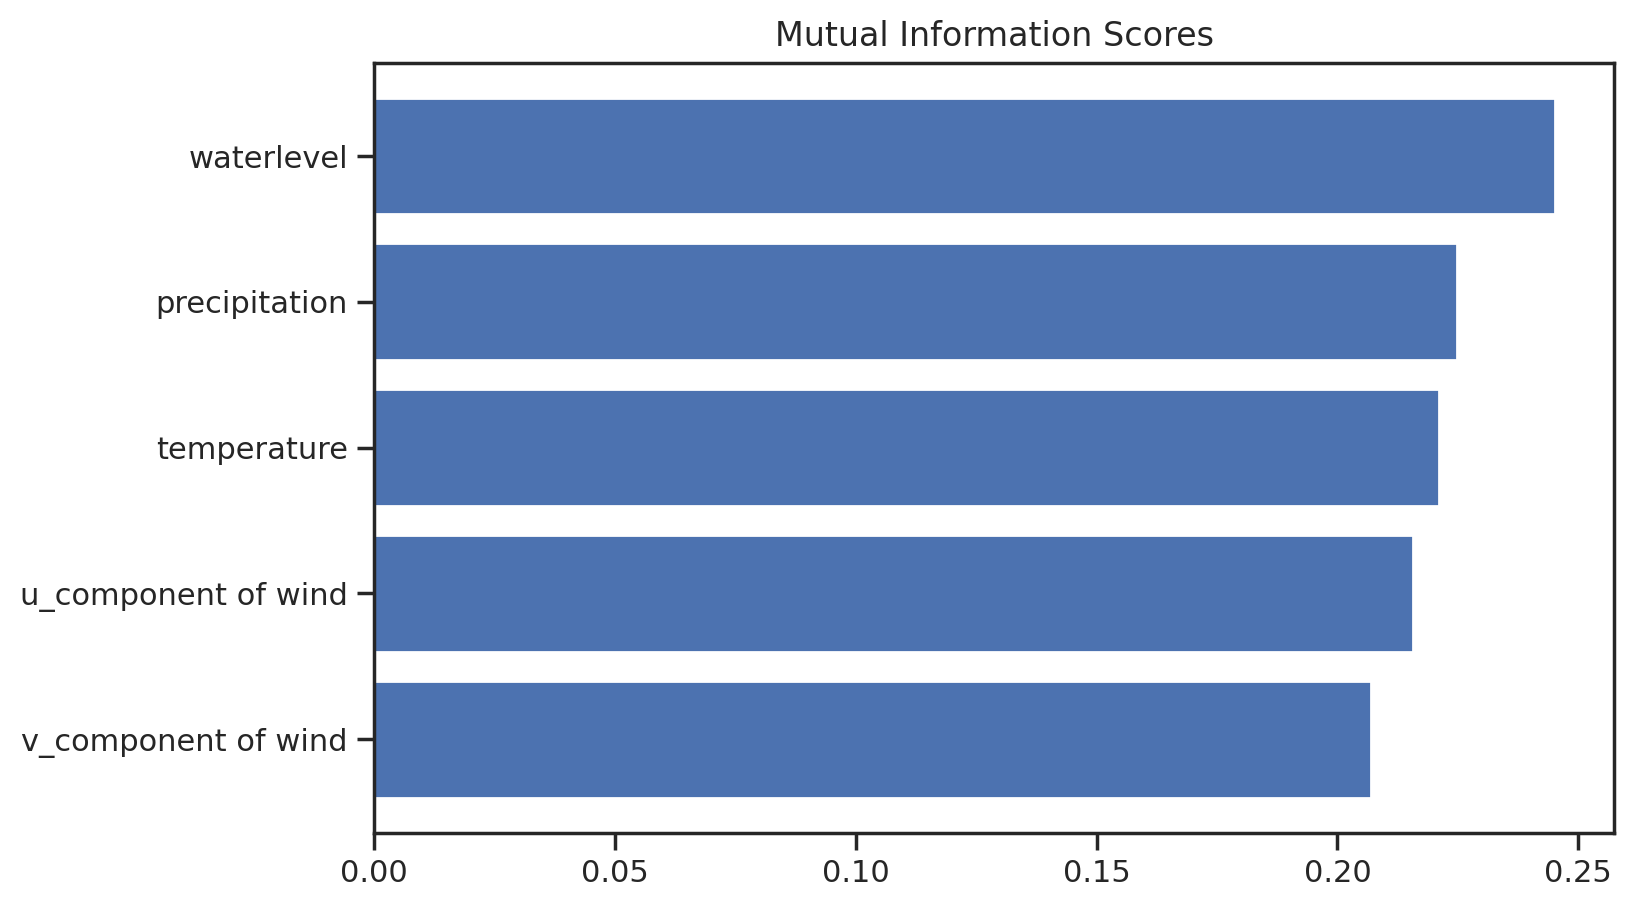

In [81]:
# Now use a bar plot to make comparisons easier
# first define a function to plot the mutual scores
def plt_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi = 200, figsize = (8,5))
plt_mi_scores(mi_scores)

### Indication of Mutual Information
1. Mutual Information assumes a linear relationship between variables. If the relationship is more complex or nonlinear, mutual information might not capture the entire scope of the feature's importance. 

2. Mutual Information assumes no interaction between features, which can be cruicial in some machine learning models

3. Since Machine learning models like random forest can capture the predictive power of features in the context of the entire dataset. They can reveal how features contribute to the overall performance of the model, considering feature interactions and complex relationships.

#### Conclusion: Though mutual information is a useful tool for feature selection and analysis, using machine learning models like random forrest to estimate feature importance provides a more comprehensive understanding of the data and the feature relationships within the context of the specific model being used. 

Thus, we just use mutual information metric to do basic exploring for potential feature selection, but we can not conclude the feature importance just based on mutual information if we want to understand the complex relationship among datasets. 

For now, all five components seems to have relationship with coherence. 

### Check on Density using Data Visualization

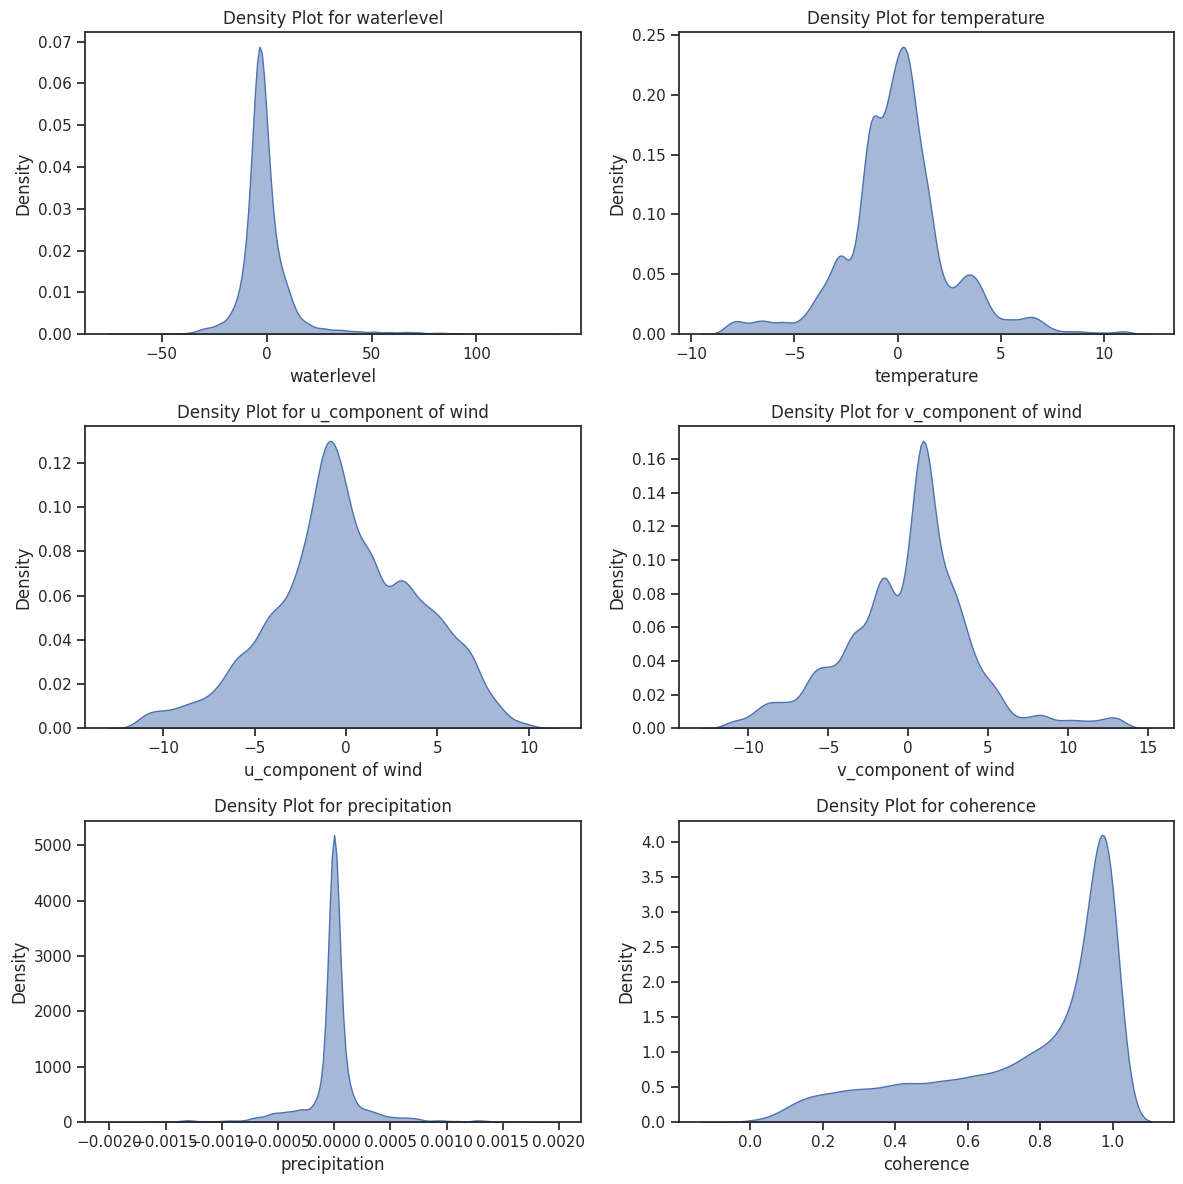

In [82]:
#sns.relplot(x = "u_component of wind",y = "coherence", data = features)
featuresnew = features[['waterlevel','temperature','u_component of wind', 'v_component of wind','precipitation','coherence']]

# create a 3*2 subplot layout
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot density plots on the subplots for each column
for i, feature in enumerate(featuresnew.columns):
    ax = axs[i // 2, i % 2]
    sns.kdeplot(data=features[feature], ax=ax, fill=True, alpha=0.5)
    ax.set_title(f'Density Plot for {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

# featuresnew = features[['waterlevel','temperature','u_component of wind', 'v_component of wind','precipitation','coherence']]
# fig, ax = plt.subplots(figsize = (13,12))
# pd.plotting.scatter_matrix(featuresnew, diagonal = 'kde', ax = ax)
# plt.show()

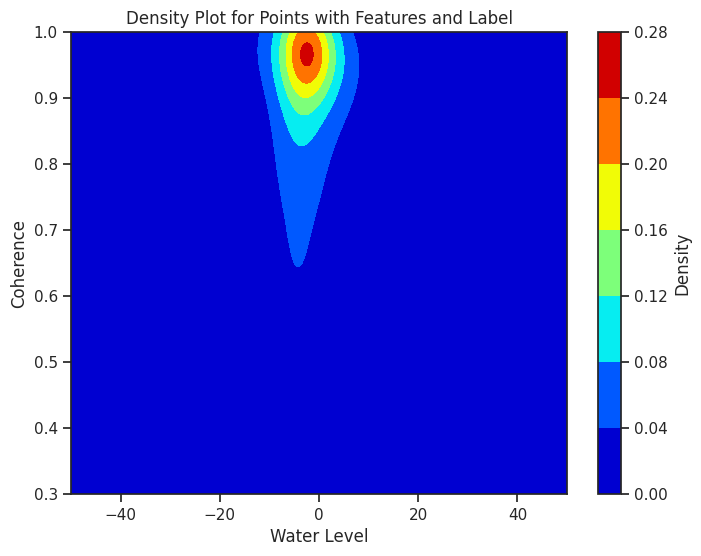

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming 'featurev' is your feature array and 'label' is your label array
#featurev = features[['waterlevel','temperature','u_component of wind', 'v_component of wind','precipitation']]
featurev = features['waterlevel']
label = features['coherence']

# Combine features and label into a single dataset
data = np.vstack([featurev, label])

# Calculate the kernel density estimate for the points
kde = gaussian_kde(data)

# Create a grid of points for the contour plot
min_features = np.min(featurev)
max_features = np.max(featurev)
min_label = np.min(label)
max_label = np.max(label)
features_grid, label_grid = np.mgrid[min_features:max_features:1000j, min_label:max_label:1000j]
grid_points = np.vstack([features_grid.ravel(), label_grid.ravel()])
z = kde(grid_points).reshape(features_grid.shape)

# Create a contour plot to show the density
plt.figure(figsize=(8, 6))
plt.contourf(features_grid, label_grid, z, cmap='jet')
plt.colorbar(label='Density')
plt.xlim([-50, 50])
plt.ylim([0.3, 1])
plt.xlabel('Water Level')
plt.ylabel('Coherence')
plt.title('Density Plot for Points with Features and Label')
plt.show()


In [ ]:
df.to_csv('clean_data.csv')